# Import Pandas and Read-in Datasets with Pandas

In [1]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Read-in the datasets
df_1 = pd.read_csv('patient_satisfaction/cms_hospital_patient_satisfaction_2020.csv', low_memory=False)
df_2 = pd.read_csv('patient_satisfaction/cms_hospital_patient_satisfaction_2019.csv', low_memory=False)
df_3 = pd.read_csv('patient_satisfaction/cms_hospital_patient_satisfaction_2018.csv', low_memory=False)
df_4 = pd.read_csv('patient_satisfaction/cms_hospital_patient_satisfaction_2017.csv', low_memory=False)
df_5 = pd.read_csv('patient_satisfaction/cms_hospital_patient_satisfaction_2016.csv', low_memory=False)

# Merge datasets into a single DataFrame
df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)

print(f'DataFrame have {df.shape[0]} Rows and {df.shape[1]} columns')

DataFrame have 1653683 Rows and 43 columns


Print DataFrame

In [2]:
import warnings #ignore warnings
warnings.filterwarnings('ignore')

df.head(5)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...","Nurses ""always"" communicated well",Not Applicable,NaN,77,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",Not Applicable,NaN,7,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,16,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,90,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3,NaN,Not Applicable,NaN,Not Applicable,535,NaN,22,NaN,07/01/2018,06/30/2019,2020,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national avera

#### Count number of NULL values in DataFrame

In [3]:
df.isnull().sum()

Facility ID                                                            0
Facility Name                                                          0
Address                                                                0
City                                                                   0
State                                                                  0
ZIP Code                                                               0
County Name                                                         2400
Phone Number                                                           0
HCAHPS Measure ID                                                      0
HCAHPS Question                                                        0
HCAHPS Answer Description                                              0
Patient Survey Star Rating                                             0
Patient Survey Star Rating Footnote                              1576857
HCAHPS Answer Percent                              

# Data Cleaning, Validation, and Exploration

### Drop all Footnote columns

In [4]:
# Select all footnote columns
footnote_columns = [col for col in df.columns if 'footnote' in col or 'Footnote' in col]

# Drop selected columns
df.drop(columns=footnote_columns, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653683 entries, 0 to 1653682
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count    Dtype 
---  ------                                                 --------------    ----- 
 0   Facility ID                                            1653683 non-null  object
 1   Facility Name                                          1653683 non-null  object
 2   Address                                                1653683 non-null  object
 3   City                                                   1653683 non-null  object
 4   State                                                  1653683 non-null  object
 5   ZIP Code                                               1653683 non-null  int64 
 6   County Name                                            1651283 non-null  object
 7   Phone Number                                           1653683 non-null  object
 8   HCAHPS Measure ID               

## 1. Facility Name

In [5]:
df['Facility Name'].value_counts()

MEMORIAL HOSPITAL                                5004
COMMUNITY MEMORIAL HOSPITAL                      2434
GOOD SAMARITAN HOSPITAL                          2236
ST JOSEPH HOSPITAL                               2224
SHRINERS HOSPITALS FOR CHILDREN                  1983
                                                 ... 
UNIVERSITY OF MD PRINCE GEORGE'S HOSPITAL CTR      50
FLORIDA HOSPITAL OCALA                             50
HEART OF LANCASTER MEDICAL CENTER                  50
ASCENSION CRITTENTON HOSPITAL                      50
SCL HEALTH COMMUNITY HOSPITAL- NORTHGLENN          50
Name: Facility Name, Length: 5769, dtype: int64

## 2. City

In [6]:
df['City'].value_counts()

CHICAGO            10034
HOUSTON             9249
PHILADELPHIA        6760
LOS ANGELES         6734
DALLAS              6245
                   ...  
ELLIJAY               55
PRESCOTT VALLEY       55
FORT OGLETHORP        55
DILLEY                55
NORTHGLENN            50
Name: City, Length: 3007, dtype: int64

## 3. State

In [7]:
df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY', 'AS', 'GU',
       'MP'], dtype=object)

### Convert State abbreviation to full states name

In [8]:
import us


# Define the conversion function
def convert_abbr_to_full(state_abbr):
    if state_abbr:
        full_state = us.states.lookup(state_abbr)
        return full_state.name if full_state else "Unknown"
    else:
        return "Unknown"

# Apply the full name conversation to the State column and store in a new column
df['Full State Name'] = df['State'].apply(convert_abbr_to_full)

# Get the index of the 'State' column
state_column = 'State'
full_state_column = df.pop('Full State Name')
index_after = df.columns.get_loc(state_column) + 1
df.insert(index_after, 'Full State Name', full_state_column)  

# Print the DataFrame with the full state names
print(df[['State', 'Full State Name']])

        State Full State Name
0          AL         Alabama
1          AL         Alabama
2          AL         Alabama
3          AL         Alabama
4          AL         Alabama
...       ...             ...
1653678    TX           Texas
1653679    TX           Texas
1653680    TX           Texas
1653681    TX           Texas
1653682    TX           Texas

[1653683 rows x 2 columns]


## 4. HCAHPS Questions 

In [9]:
print(df['HCAHPS Question'].value_counts())

Patients who reported that their nurses "Always" communicated well                                                     23928
Patients who "Strongly Agree" they understood their care when they left the hospital                                   23928
Cleanliness - linear mean score                                                                                        23928
Patients who reported that their room and bathroom were "Usually" clean                                                23928
Patients who reported that their room and bathroom were "Sometimes" or "Never" clean                                   23928
                                                                                                                       ...  
Patients who "Strongly Agree" that the staff took my preferences into account when determining my health care needs     9516
Patients who "Agree" that they understood their responsiblities in managing their health                                9516


## 5. HCAHPS Answer Description

In [10]:
print(df['HCAHPS Answer Description'].value_counts())

Nurses "always" communicated well                                                                                   23928
"Always" quiet at night                                                                                             23928
Staff "usually" explained                                                                                           23928
Communication about medicines - linear mean score                                                                   23928
Communication about medicines - star rating                                                                         23928
                                                                                                                    ...  
Patients who "Agree" they understood their responsiblities when they left the hospital                               9516
Patients "usually" received call button help as soon as they wanted                                                  9516
Patients who "Strongly A

### Remove quotations from HCAHPS question and answers values

In [11]:
# Replace qoutations with nothing
df['HCAHPS Answer Description'] = df['HCAHPS Answer Description'].str.replace('"', '')

df['HCAHPS Question'] = df['HCAHPS Question'].str.replace('"', '')

In [12]:
df[['HCAHPS Question','HCAHPS Answer Description']].value_counts()

HCAHPS Question                                                                                                HCAHPS Answer Description                                          
Care transition - linear mean score                                                                            Care transition - linear mean score                                    23928
Patients who reported that their nurses Always communicated well                                               Nurses always communicated well                                        23928
Patients who reported YES, they would probably recommend the hospital                                          YES, patients would probably recommend the hospital                    23928
Patients who reported that NO, they were not given information about what to do during their recovery at home  No, staff did not give patients this information                       23928
Patients who reported that YES, they were given information about wha

## Word Occurences in HCAHPS Answer Description

In [13]:
# Import Count Vectorizer from Scikit Learn for words extraction
from sklearn.feature_extraction.text import CountVectorizer
# Import Wordcloud for words visualization
from wordcloud import WordCloud

# Create a word frequency matrix
vectorizer = CountVectorizer(stop_words='english')
word_freq_matrix = vectorizer.fit_transform(df['HCAHPS Answer Description'])

# Get the most frequent words
words = vectorizer.get_feature_names_out()
word_counts = word_freq_matrix.sum(axis=0).tolist()[0]
word_freq = dict(zip(words, word_counts))

# Print the most frequent words
print("Most Frequent Words:")
for word, count in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:50]:
    print(f"{word}: {count} occurrences")

Most Frequent Words:
patients: 515796 occurrences
rating: 392467 occurrences
hospital: 296376 occurrences
staff: 291204 occurrences
star: 272827 occurrences
linear: 248899 occurrences
mean: 248899 occurrences
score: 248899 occurrences
usually: 248347 occurrences
explained: 185976 occurrences
doctors: 157428 occurrences
nurses: 157428 occurrences
help: 147912 occurrences
communicated: 143568 occurrences
communication: 143568 occurrences
recommend: 143568 occurrences
information: 133776 occurrences
left: 128880 occurrences
received: 128880 occurrences
soon: 128880 occurrences
understood: 128880 occurrences
wanted: 128880 occurrences
care: 119640 occurrences
agree: 104952 occurrences
disagree: 104952 occurrences
strongly: 104952 occurrences
yes: 90816 occurrences
did: 85920 occurrences
clean: 71784 occurrences
gave: 71784 occurrences
night: 71784 occurrences
quiet: 71784 occurrences
room: 71784 occurrences
discharge: 66888 occurrences
carefully: 57096 occurrences
courtesy: 57096 occurrenc

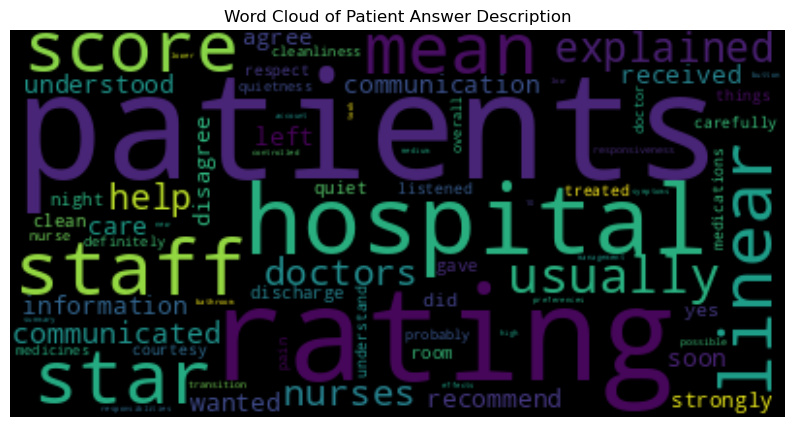

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a word cloud
wordcloud = WordCloud().generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Word Cloud of Patient Answer Description')
plt.show()

In [15]:
wordcloud.to_file(r'C:\Users\hp\Desktop\MyYorkSJ\WordOccurenceCloud.png')

### 6. Patient Survey Star Rating

In [16]:
df['Patient Survey Star Rating'].value_counts()

Not Applicable    1380856
Not Available       76826
3                   71713
4                   60899
2                   37491
5                   16563
1                    9335
Name: Patient Survey Star Rating, dtype: int64

#### Investigate the relationship between HCAHPS Answer Rating and Patient Survey Star Rating

In [17]:
# Filter df to display HCAHPS Answer Description where Patitient Survey Star Rating is Not Applicable
filtered_df = df[df['Patient Survey Star Rating'] == 'Not Applicable']

filtered_df[['HCAHPS Answer Description','Patient Survey Star Rating']]

,HCAHPS Answer Description,Patient Survey Star Rating
0,Nurses always communicated well,Not Applicable
1,Nurses sometimes or never communicated well,Not Applicable
2,Nurses usually communicated well,Not Applicable
3,Nurse communication - linear mean score,Not Applicable
5,Nurses always treated them with courtesy and ...,Not Applicable
...,...,...
1653676,Quietness - linear mean score,Not Applicable
1653678,"NO, patients would not recommend the hospital ...",Not Applicable
1653679,"YES, patients would definitely recommend the h...",Not Applicable
1653680,Recommend hospital - linear mean score,Not Applicable


#### Drop rows where HCAHPS Answer Description conatined 'linear', 'mean', 'score', 'rating', and 'star' and Patient Survey Star Rating is 'Not Applicable'

In [18]:
# Define the list of words to check for in 'HCAHPS Answer Description'
words_to_check = ['rating', 'score', 'star', 'linear', 'mean']

# Identify rows to drop
mask = (df['Patient Survey Star Rating'] == 'Not Applicable') & (df['HCAHPS Answer Description'].str.contains('|'.join(words_to_check)))
 
# Drop rows based on the mask
df = df[~mask].copy() # Copy not masked rows

# Reset index to keep not masked rows and drop masked rows
df.reset_index(drop=True, inplace=True)

# Filter to confirm dropped rows
filtered_df = df[df['Patient Survey Star Rating'] == 'Not Applicable']

filtered_df[['HCAHPS Answer Description','Patient Survey Star Rating']]

,HCAHPS Answer Description,Patient Survey Star Rating
0,Nurses always communicated well,Not Applicable
1,Nurses sometimes or never communicated well,Not Applicable
2,Nurses usually communicated well,Not Applicable
4,Nurses always treated them with courtesy and ...,Not Applicable
5,Nurses sometimes or never treated them with co...,Not Applicable
...,...,...
1332993,Sometimes or never quiet at night,Not Applicable
1332994,Usually quiet at night,Not Applicable
1332996,"NO, patients would not recommend the hospital ...",Not Applicable
1332997,"YES, patients would definitely recommend the h...",Not Applicable


#### Drop rows where HCAHPS Answer Description conatined 'linear', 'mean', 'score', 'rating', and 'star' and Patient Survey Star Rating is 'Not Available'

In [19]:
filtered_df = df[df['Patient Survey Star Rating'] == 'Not Available']

filtered_df[['HCAHPS Answer Description','Patient Survey Star Rating']]

,HCAHPS Answer Description,Patient Survey Star Rating
323,Nurse communication - star rating,Not Available
336,Doctor communication - star rating,Not Available
349,Staff responsiveness - star rating,Not Available
359,Communication about medicines - star rating,Not Available
368,Discharge information - star rating,Not Available
...,...,...
1332985,Discharge information - star rating,Not Available
1332990,Care transition - star rating,Not Available
1332991,Overall hospital rating - star rating,Not Available
1332995,Quietness - star rating,Not Available


In [20]:
# Define the list of words to check for in 'HCAHPS Answer Description'
words_to_check = ['rating', 'star']

# Identify rows to drop
mask = (df['Patient Survey Star Rating'] == 'Not Available') & (df['HCAHPS Answer Description'].str.contains('|'.join(words_to_check)))

# Drop rows based on the mask
df = df[~mask].copy() # Copy not masked rows

# Reset index to keep not masked rows and drop masked rows
df.reset_index(drop=True, inplace=True)

# Filter to confirm dropped rows
filtered_df = df[df['Patient Survey Star Rating'] == 'Not Available']

filtered_df[['HCAHPS Answer Description','Patient Survey Star Rating']]

,HCAHPS Answer Description,Patient Survey Star Rating


#### Rows where Patient Survey Star Rating contained 1, 2, 3, 4, and 5

In [22]:
filtered_df = df[df['Patient Survey Star Rating'].isin(['1', '2', '3', '4', '5'])]

filtered_df[['HCAHPS Answer Description','Patient Survey Star Rating']]

,HCAHPS Answer Description,Patient Survey Star Rating
3,Nurse communication - star rating,3
16,Doctor communication - star rating,3
29,Staff responsiveness - star rating,3
39,Communication about medicines - star rating,3
48,Discharge information - star rating,4
...,...,...
1255985,Discharge information - star rating,3
1255990,Care transition - star rating,2
1255991,Overall hospital rating - star rating,4
1255995,Quietness - star rating,4


In [23]:
df['Patient Survey Star Rating'].value_counts()

Not Applicable    1060173
3                   71713
4                   60899
2                   37491
5                   16563
1                    9335
Name: Patient Survey Star Rating, dtype: int64

## 7. Year

In [24]:
df['Year'].value_counts()

2019    365446
2020    365309
2017    181428
2016    181379
2018    162612
Name: Year, dtype: int64

## 8. Hospital Type

In [25]:
df['Hospital Type'].value_counts()

Acute Care Hospitals                  906787
Critical Access Hospitals             325166
Childrens                              21443
Acute Care - Department of Defense      2778
Name: Hospital Type, dtype: int64

#### Merge two Acute care hospitals into one

In [26]:
# Merge Duplicate Hospital Types into one
df['Hospital Type'] = df['Hospital Type'].replace(
    {'Acute Care Hospitals': 'Acute Care', 'Acute Care - Department of Defense': 'Acute Care'})

In [27]:
df['Hospital Type'].unique()

array(['Acute Care', 'Critical Access Hospitals', 'Childrens'],
      dtype=object)

## 9. Hospital Ownership

In [28]:
df['Hospital Ownership'].value_counts()

Voluntary non-profit - Private                 555354
Proprietary                                    209008
Government - Hospital District or Authority    136257
Voluntary non-profit - Other                   114098
Government - Local                             101864
Voluntary non-profit - Church                   88557
Physician                                       18886
Government - State                              16990
Government - Federal                            10241
Department of Defense                            2778
Tribal                                           2141
Name: Hospital Ownership, dtype: int64

#### Merge similar Hospital Ownership into one and create a new column Hospital Ownership Group

In [29]:
# Merge the similar hospital ownership to create a new column
df['Hospital Ownership Group'] = df['Hospital Ownership'].replace({'Voluntary non-profit - Private': 'Voluntary non-profit',
                                  'Voluntary non-profit - Church': 'Voluntary non-profit',
                                  'Voluntary non-profit - Other': 'Voluntary non-profit',
                                  'Proprietary': 'Proprietary',
                                  'Physician': 'Proprietary',
                                  'Tribal': 'Proprietary',
                                  'Government - Local': 'Government',
                                  'Government - Hospital District or Authority': 'Government',
                                  'Government - State': 'Government',
                                  'Government - Federal': 'Government',
                                  'Department of Defense': 'Government',
                                 })

In [30]:
df['Hospital Ownership Group'].value_counts()

Voluntary non-profit    758009
Government              268130
Proprietary             230035
Name: Hospital Ownership Group, dtype: int64

## 10. Emergency Services

In [31]:
df['Emergency Services'].value_counts()

Yes    1169206
No       86968
Name: Emergency Services, dtype: int64

## 11. Criteria for Interoperabilty of EHRs

In [32]:
df['Meets criteria for promoting interoperability of EHRs'].value_counts()

Y                1096279
Not Available         87
Name: Meets criteria for promoting interoperability of EHRs, dtype: int64

## 11. Hopspital Overall Rating

In [33]:
df['Hospital overall rating'].value_counts()

3                364939
4                291562
Not Available    265897
2                200450
5                 74728
1                 58598
Name: Hospital overall rating, dtype: int64

## 12. Mortality National Comparison

In [34]:
df['Mortality national comparison'].value_counts()

Same as the national average    616795
Not Available                   326442
Same as the National average    108096
Above the national average       91970
Below the national average       82526
Above the National average       16388
Below the National average       13957
Name: Mortality national comparison, dtype: int64

## 13. Readmission National Comparison

In [35]:
df['Readmission national comparison'].value_counts()

Above the national average      322016
Below the national average      294623
Same as the national average    262471
Not Available                   227379
Same as the National average     81105
Below the National average       35341
Above the National average       33239
Name: Readmission national comparison, dtype: int64

## 14. Safety of Care National Comparison

In [36]:
df['Safety of care national comparison'].value_counts()

Not Available                   523525
Above the national average      266574
Below the national average      200635
Same as the national average    156794
Same as the National average     49126
Above the National average       32255
Below the National average       27265
Name: Safety of care national comparison, dtype: int64

## 15. Patient Experience National Comparison

In [37]:
df['Patient experience national comparison'].value_counts()

Not Available                   306054
Above the national average      279532
Same as the national average    270082
Below the national average      258892
Above the National average       49897
Same as the National average     47273
Below the National average       44444
Name: Patient experience national comparison, dtype: int64

## 16. Effectiveness of Care National Comparison

In [38]:
df['Effectiveness of care national comparison'].value_counts()

Same as the national average    741021
Not Available                   279625
Same as the National average    128736
Below the national average       63437
Above the national average       28388
Below the National average        9649
Above the National average        5318
Name: Effectiveness of care national comparison, dtype: int64

## 17. Timeliness of Care National Comparison

In [39]:
df['Timeliness of care national comparison'].value_counts()

Same as the national average    339511
Above the national average      278093
Not Available                   253897
Below the national average      243740
Same as the National average     61256
Above the National average       42608
Below the National average       37069
Name: Timeliness of care national comparison, dtype: int64

## 18. Effecient Use of Medical Imaging National Comparison

In [40]:
df['Efficient use of medical imaging national comparison'].value_counts()

Same as the national average    509198
Not Available                   442084
Above the national average       96222
Below the national average       95672
Same as the National average     83195
Below the National average       15125
Above the National average       14678
Name: Efficient use of medical imaging national comparison, dtype: int64

### Measure comaprisons words replacement

In [41]:
df = df.replace({
    'Same as the national average': 'Same',
    'Same as the National average': 'Same',
    'Below the national average': 'Below',
    'Below the National average': 'Below',
    'Above the national average': 'Above',
    'Above the National average': 'Above',
    'Not Available': np.nan
    
})

# Sentiment Analysis with VADER

Sentiment analysis will only be done on rows not containing generated words like 'star' and 'rating' in the HCAHPS Answer Description column so as to successfuly perform the analysis on actual texts input in the survey by the patients.

In [42]:
# Create Sentiment DataFrame excluding HCAHPS Answer Description rows that contains 'star' and 'ratingg'
df_sentiment = df[['HCAHPS Answer Description']].copy()

# Identify rows to keep
words_not_to_select = ['star', 'rating']
mask = ~(df_sentiment['HCAHPS Answer Description'].str.contains('|'.join(words_not_to_select)))

# Filter the DataFrame with the mask
df_sentiment = df_sentiment[mask].copy() 

# Reset index to keep rows not mask and dropped masked rows
df_sentiment.reset_index(drop=True, inplace=True)

#print(df_sentiment['HCAHPS Answer Description'])

#### Perform Vader Sentiment Analysis on texts in the column

In [43]:
# Import Sentiment Intensity Analyzer from VADER Natural Language Toolkit 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Store the VADER sentiment analyzer in a variable
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the 'HCAHPS Answer Description' column
Sentiment_Score = df_sentiment['HCAHPS Answer Description'].apply(lambda x: sid.polarity_scores(x.lower())['compound'])

In [44]:
Sentiment_Score.unique()

array([ 0.2732, -0.2057,  0.6808,  0.128 , -0.0951,  0.    ,  0.4019,
       -0.3089, -0.296 ,  0.6597,  0.6908,  0.0258,  0.7783,  0.3612,
       -0.4767,  0.5574, -0.7703,  0.7845,  0.6369, -0.6266,  0.4939])

### Create new column Sentiment Categories

Use qcut function in pandas to divide the Sentiment_Score to 5 bins and assigned the lables to the bins in order from lowest to highest 

In [45]:
# Use qcut function in pandas to divide the Sentiment_Score to 5 bins
df_sentiment['Sentiment Categories'] = pd.qcut(Sentiment_Score, q=5, 
                                               labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])

# Print the sentiment categories
print(df_sentiment['Sentiment Categories'].value_counts())

Negative         276792
Very Negative    220005
Positive         205284
Very Positive    200491
Neutral          157601
Name: Sentiment Categories, dtype: int64


### Merge the sentiment dataframe back to the original dataframe

In [46]:
# Reset the index of df_sentiment to match the original DataFrame's index
df_sentiment.reset_index(drop=True, inplace=True)

# Merge the sentiment analysis results back into the original DataFrame
df['Sentiment Categories'] = df_sentiment['Sentiment Categories']


# Print updated DataFrame
df.head(5)

,Facility ID,Facility Name,Address,City,State,Full State Name,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital Ownership Group,Sentiment Categories
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,Patients who reported that their nurses Always...,Nurses always communicated well,Not Applicable,77,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Neutral
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,Patients who reported that their nurses Someti...,Nurses sometimes or never communicated well,Not Applicable,7,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Very Negative
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,Patients who reported that their nurses Usuall...,Nurses usually communicated well,Not Applicable,16,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Neutral
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3,Not Applicable,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Very Positive
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_NURSE_RESPECT_A_P,Patients who reported that their nurses Always...,Nurses always treated them with courtesy and ...,Not Applicable,83,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Very Positive


### New column for sentiment value

In [47]:
# Replace the sentiment categories values with equivalent number and store in new column 
df['Sentiment Value'] = df['Sentiment Categories'].replace({
    'Very Positive': 5,
    'Positive': 4,
    'Neutral': 3,
    'Negative': 2,
    'Very Negative': 1
})

# Drop rows where 'Sentiment Value' is NaN
df = df.dropna(subset=['Sentiment Value'])

df['Sentiment Value'].astype(int)

0          3
1          1
2          3
3          5
4          5
          ..
1060168    2
1060169    2
1060170    1
1060171    5
1060172    5
Name: Sentiment Value, Length: 1060173, dtype: int32

In [49]:
df[['HCAHPS Answer Description', 'Sentiment Categories', 'Sentiment Value']].head(10)

,HCAHPS Answer Description,Sentiment Categories,Sentiment Value
0,Nurses always communicated well,Neutral,3
1,Nurses sometimes or never communicated well,Very Negative,1
2,Nurses usually communicated well,Neutral,3
3,Nurse communication - star rating,Very Positive,5
4,Nurses always treated them with courtesy and ...,Very Positive,5
5,Nurses sometimes or never treated them with co...,Very Positive,5
6,Nurses usually treated them with courtesy and...,Neutral,3
7,Nurses always listened carefully,Negative,2
8,Nurses sometimes or never listened carefully,Neutral,3
9,Nurses usually listened carefully,Negative,2


### Setting the Eligible for Funding criteria

In [50]:
pointers = df[['Emergency Services','Mortality national comparison',
                  'Safety of care national comparison', 
                  'Readmission national comparison',
                  'Patient experience national comparison',
                  'Effectiveness of care national comparison',
                  'Timeliness of care national comparison',
                  'Efficient use of medical imaging national comparison',
                   'Sentiment Value']]

* Set weight score to columns by their level of importance
* Set point scores for values in the columns
* Apply point scores to each columns
* Sum the point scores on each Pointers DataFrame rows and multiply with the column weighted score
* Set threshold to the median of the weighted total point on each row
* Set eligibility to 1 if weighted total score is greater than median and 0 if not

In [50]:
# Define weight dictionary
weight_mapping = {
    'Emergency Services': 1,
    'Mortality national comparison': 3,
    'Safety of care national comparison': 2,
    'Readmission national comparison': 3,
    'Patient experience national comparison': 2,
    'Effectiveness of care national comparison': 2,
    'Timeliness of care national comparison': 2,
    'Efficient use of medical imaging national comparison': 1,
    'Sentiment Value': 2
}

# Assign points based on column values
points_mapping = {
    'Yes': 1, 'No': 0,
    'Above': 2, 'Same': 1, 'Below': 0,
    5: 5, 4: 4, 3: 3, 2: 2, 1: 1
}

# Define mappings for 'Mortality national comparison' and 'Readmission national comparison' columns
neg_comp_mappings = {
    'Mortality national comparison': {'Above': 0, 'Same': 1, 'Below': 2},
    'Readmission national comparison': {'Above': 0, 'Same': 1, 'Below': 2}
}

# Apply mappings for each column
for col in pointers.columns:
    if col == 'Emergency Services':
        pointers[col] = pointers[col].map({'Yes': 1, 'No': 0})
    elif col in neg_comp_mappings:
        pointers[col] = pointers[col].map(neg_comp_mappings[col]).fillna(pointers[col].map(points_mapping))
    else:
        pointers[col] = pointers[col].map(points_mapping)

# Fill NaN values with 0
pointers = pointers.fillna(0)

# Calculate weighted total score for each row
pointers['Weighted Total Score'] = pointers.apply(lambda row: sum(row[col] * weight_mapping.get(col, 0) for col in pointers.columns), axis=1)

# Determine threshold
threshold = np.median(pointers['Weighted Total Score'])

# Assign label based on threshold
df['Eligible For Funding'] = np.where(pointers['Weighted Total Score'] >= threshold, 1, 0)

# Print the resulting DataFrame
#print(pointers.head())

In [51]:
df['Eligible For Funding'].value_counts()

1    584932
0    475241
Name: Eligible For Funding, dtype: int64

In [52]:
df.head(4)

,Facility ID,Facility Name,Address,City,State,Full State Name,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,HCAHPS Answer Percent,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date,Year,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Hospital Ownership Group,Sentiment Categories,Sentiment Value,Eligible For Funding
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,Patients who reported that their nurses Always...,Nurses always communicated well,Not Applicable,77,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Neutral,3,1
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,Patients who reported that their nurses Someti...,Nurses sometimes or never communicated well,Not Applicable,7,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Very Negative,1,1
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,Patients who reported that their nurses Usuall...,Nurses usually communicated well,Not Applicable,16,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Neutral,3,1
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,Alabama,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,Nurse communication - star rating,3,Not Applicable,Not Applicable,535,22,07/01/2018,06/30/2019,2020,Acute Care,Government - Hospital District or Authority,Yes,Y,2,Below,Same,Below,Below,Same,Same,Same,Government,Very Positive,5,1


### Save DataFrame to Azure Data Storage Blob

In [53]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__
import os

# Create the CSV file
csv_file_name = "healthcare_patient_satisfaction_df.csv"
df.to_csv(csv_file_name, index=False)

# Azure connection string
connect_str = "DefaultEndpointsProtocol=https;AccountName=thegroupproject;AccountKey=ZrsqB0h1P58bItB4WmuXcKAzGbXBFI/mGa6M6jYYvyuPgDQ5kqjPI8DJbvDhSsuwqVQqwoqzU8mA+AStHubvaQ==;EndpointSuffix=core.windows.net"

# Create the BlobServiceClient object
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

# The name of the container to upload the file to
container_name = "healthcare-group-project"

# Create the BlobClient object
blob_client = blob_service_client.get_blob_client(container=container_name, blob=csv_file_name)

try:
    # Open CSV file and upload its content to Azure Blob Storage
    with open(csv_file_name, "rb") as data:
        blob_client.upload_blob(data, overwrite=True)  # Added overwrite=True to handle the case if the blob already exists
    print(f"Successfully uploaded {csv_file_name} to Azure Blob Storage.")
except Exception as e:
    print(f"Error occurred: {str(e)}")

Successfully uploaded healthcare_patient_satisfaction_df.csv to Azure Blob Storage.
